## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To display the graphs within the notebook automatically

%matplotlib inline

In [3]:
# Define path

path = r'/Users/vanessanunezpenas/Documents/Data Analysis Projects/Airbnb Berlin Ratings/2. Data'

In [4]:
# Import Airbnb Berlin data

berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))

/tmp/ipykernel_88703/1382111025.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))


## Data Cleaning

In [5]:
# Create a subset with the columns to use

sub_berlin = berlin[['Listing ID','Price','Overall Rating', 'Location Rating','Neighborhood Group', 'Postal Code']]

In [6]:
sub_berlin.head()

,Listing ID,Price,Overall Rating,Location Rating,Neighborhood Group,Postal Code
0,10002699,60.0,100.0,10.0,Neukölln,12047.0
1,10006647,35.0,92.0,10.0,Mitte,10178.0
2,10006647,35.0,92.0,10.0,Mitte,10178.0
3,10006647,35.0,92.0,10.0,Mitte,10178.0
4,10006647,35.0,92.0,10.0,Mitte,10178.0


In [7]:
sub_berlin.shape

(451600, 6)

In [8]:
sub_berlin.isnull().sum()

Listing ID               0
Price                    0
Overall Rating           0
Location Rating          0
Neighborhood Group       0
Postal Code           7568
dtype: int64

Considering we can not to use the Postal Code column in the regression, we have decided to do nothing with the missing values in that column. 

In [9]:
# Checking mixed-type data in same column

for col in sub_berlin.columns.tolist():
  weird = (sub_berlin[[col]].applymap(type) != sub_berlin[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (sub_berlin[weird]) > 0:
    print (col)

Postal Code


In [10]:
sub_berlin['Postal Code'] = sub_berlin['Postal Code'].astype(str)

/tmp/ipykernel_88703/3212640793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin['Postal Code'] = sub_berlin['Postal Code'].astype(str)


In [11]:
sub_berlin['Postal Code'].value_counts(dropna = False)

Postal Code
10115.0    18384
10405.0    14301
10119.0    13495
10437.0    12660
10247.0    12093
           ...  
16761.0        2
13439          1
12349          1
14053.0        1
14482.0        1
Name: count, Length: 388, dtype: int64

In [12]:
# Extract postal codes

sub_berlin['Postal Code_clean'] = sub_berlin['Postal Code'].str[:5]

/tmp/ipykernel_88703/1298401731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin['Postal Code_clean'] = sub_berlin['Postal Code'].str[:5]


In [13]:
sub_berlin['Postal Code_clean'].value_counts(dropna = False)

Postal Code_clean
10115    23480
10405    17792
10437    16649
10119    16615
10247    15859
         ...  
12046        5
12279        5
16761        2
14482        1
14053        1
Name: count, Length: 201, dtype: int64

In [14]:
# Drop the dirty Postal Code column

sub_berlin = sub_berlin.drop(columns=['Postal Code'])

In [15]:
# Renaming the new clean column

sub_berlin.rename(columns = {'Postal Code_clean': 'Postal Code'}, inplace=True)

In [16]:
# Check extreme values in price

sub_berlin[sub_berlin['Price'] > 300]

,Listing ID,Price,Overall Rating,Location Rating,Neighborhood Group,Postal Code
5029,102882,506.0,94.0,9.0,Friedrichshain-Kreuzberg,10967
5030,102882,506.0,94.0,9.0,Friedrichshain-Kreuzberg,10967
5031,102882,506.0,94.0,9.0,Friedrichshain-Kreuzberg,10967
5032,102882,506.0,94.0,9.0,Friedrichshain-Kreuzberg,10967
5033,102882,506.0,94.0,9.0,Friedrichshain-Kreuzberg,10967
...,...,...,...,...,...,...
447699,9770154,304.0,97.0,9.0,Friedrichshain-Kreuzberg,10965
447700,9770154,304.0,97.0,9.0,Friedrichshain-Kreuzberg,10965
447701,9770154,304.0,97.0,9.0,Friedrichshain-Kreuzberg,10965
447702,9770154,304.0,97.0,9.0,Friedrichshain-Kreuzberg,10965


In [17]:
sub_berlin['Price'].mean()

67.72978299379982

In [18]:
sub_berlin['Price'].median()

53.0

In [19]:
sub_berlin['Price'].max()

888.0

In [20]:
# Impute missing values with median

sub_berlin['Price'].fillna(sub_berlin['Price'].median(),inplace=True)
sub_berlin['Overall Rating'].fillna(sub_berlin['Overall Rating'].median(),inplace=True)
sub_berlin['Location Rating'].fillna(sub_berlin['Location Rating'].median(),inplace=True)

In [21]:
# Clean extreme values

sub_berlin = sub_berlin[sub_berlin['Price'] < 300]

In [22]:
sub_berlin.shape

(448246, 6)

In [23]:
# 2nd check for missing values

sub_berlin.isnull().sum()

Listing ID            0
Price                 0
Overall Rating        0
Location Rating       0
Neighborhood Group    0
Postal Code           0
dtype: int64

In [24]:
# Checking Duplicates
dups = sub_berlin.duplicated()
dups.sum()

429525

In [25]:
# Dropping duplicate values 

sub_berlin.drop_duplicates(keep='first', inplace=True)

In [26]:
dups.shape

(448246,)

In [27]:
sub_berlin.head()

,Listing ID,Price,Overall Rating,Location Rating,Neighborhood Group,Postal Code
0,10002699,60.0,100.0,10.0,Neukölln,12047
1,10006647,35.0,92.0,10.0,Mitte,10178
21,10006747,30.0,90.0,9.0,Pankow,13189
23,10007526,30.0,100.0,9.0,Friedrichshain-Kreuzberg,10963
26,10007952,70.0,100.0,10.0,Steglitz - Zehlendorf,12163


## Explore the data visually

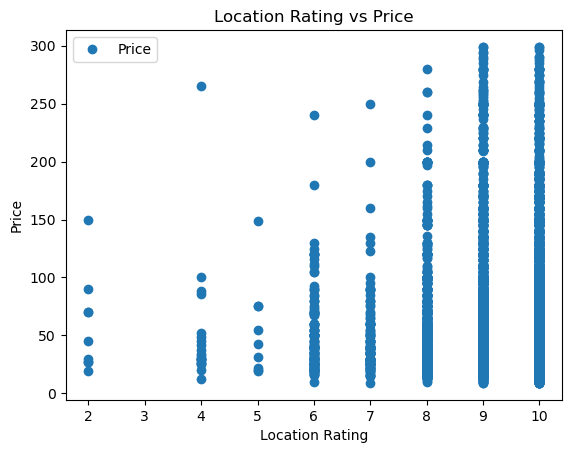

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_berlin.plot(x = 'Location Rating', y='Price',style='o')
plt.title('Location Rating vs Price')  
plt.xlabel('Location Rating')  
plt.ylabel('Price')  
plt.show()

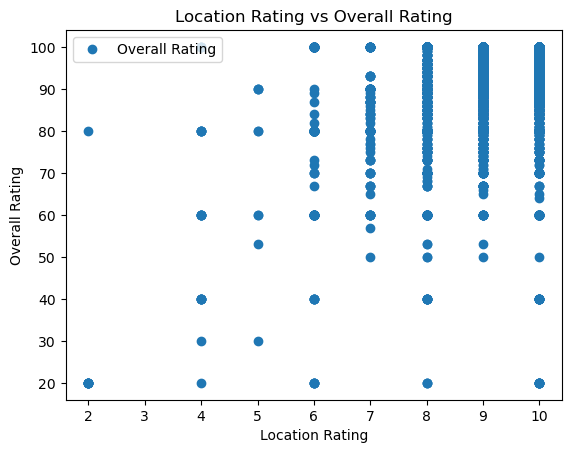

In [29]:
sub_berlin.plot(x = 'Location Rating', y='Overall Rating',style='o')
plt.title('Location Rating vs Overall Rating')  
plt.xlabel('Location Rating')  
plt.ylabel('Overall Rating')  
plt.show()

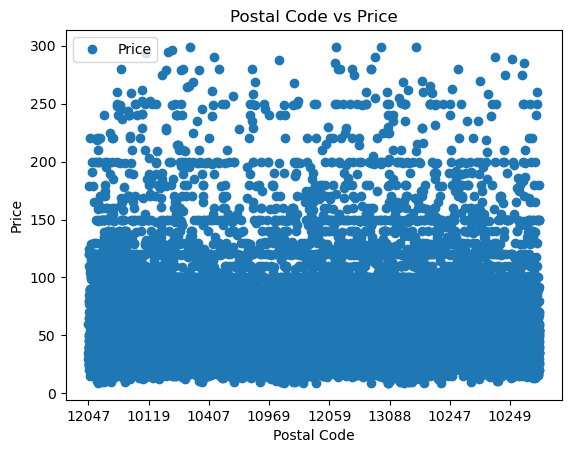

In [30]:
sub_berlin.plot(x = 'Postal Code', y='Price',style='o')
plt.title('Postal Code vs Price')  
plt.xlabel('Postal Code')  
plt.ylabel('Price')  
plt.show()

The variables of our data set are not especially correlated, but we would like to look further the connection between location rating and price. It would be interesting to check it with the Postal Code, but unfortunately we cannot use this variable in the regression. 

## Reshape the variables

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_berlin['Location Rating'].values.reshape(-1,1)
y = sub_berlin['Price'].values.reshape(-1,1)

In [32]:
X

array([[10.],
       [10.],
       [ 9.],
       ...,
       [10.],
       [10.],
       [ 9.]])

In [33]:
y

array([[ 60.],
       [ 35.],
       [ 30.],
       ...,
       [ 60.],
       [150.],
       [ 80.]])

## Split the data into two sets: a training set and a test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [35]:
# Create a regression object.

regression = LinearRegression()

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## Create a plot that shows the regression line on the test set

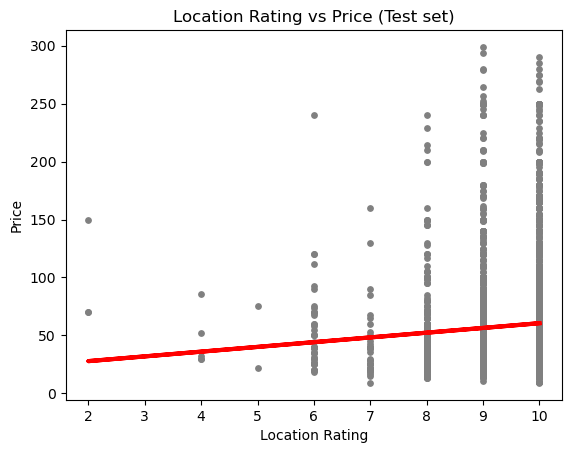

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Location Rating vs Price (Test set)')
plot_test.xlabel('Location Rating')
plot_test.ylabel('Price')
plot_test.show()

As expected, the linear model represented by the red regression line doesn’t cover the data points.

## Check the model performance statistics

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.09195589]]
Mean squared error:  1567.1558648632474
R2 score:  0.0040413152172469324


In [41]:
y_predicted

array([[60.54344814],
       [60.54344814],
       [60.54344814],
       ...,
       [60.54344814],
       [56.45149226],
       [60.54344814]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,50.0,60.543448
1,250.0,60.543448
2,50.0,60.543448
3,22.0,60.543448
4,49.0,60.543448
5,40.0,60.543448
6,43.0,60.543448
7,30.0,56.451492
8,50.0,60.543448
9,40.0,56.451492


The model is totally innacurated and the location rating has not influence at all in the price. 

Unfortunately, our data set had no better columns to use for this exercise. 